## Modelo Predictivo
El objetivo de este modelo sera predecir futuros brotes de la enfermedad Dengue utilizanod una regresion multiple

Utilizaremos las librerias numpy y pandas

In [1]:
# Importamos las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

Leemos el dataFinal creado por nosotros en el notebook Filtracion_Data_Dengue, y establecemos la coma como decimal para que detecte los numeros decimales


In [2]:
data = pd.read_csv('dataFinal.csv',decimal=',')
data.head()


,semana,ano,casos,Temp. Media (°C),Precipitación (mm),Humedad (%),PobrezaTotal(%)
0,10,2023,5,25.16,108.06,83.00,14322066.9
1,11,2023,12,25.46,55.48,84.46,14322066.9
2,12,2023,43,25.99,62.67,81.69,14322066.9
3,13,2023,60,25.49,63.02,84.65,14322066.9
4,14,2023,34,25.12,81.76,89.12,14322066.9


Seleccionamos las columnas que usaremos como variables. <br>
En X utilizaremos la columna semana (columna 0), la columna Temp. Media (°C) (columna 3), la columna Precipitación (mm) (columna 4) y la columna Humedad (%) (columna 5). <br>
En Y utilizamos solo la columna casos (columna 2)

In [3]:
# --- Obtener datos de las columnas (solo valores)
X = data.values[:, [0,3,4,5]].astype(float)
Y = data.values[:, 2]


Normalizamos los datos para mejorar la manejabilidad de estos, aplicando metodos estadisticos como la media y la desviacion estandar 


In [4]:
# --- Obtener la media
mu = np.mean(X, axis = 0)
print("La media de X es igual a: "+str(mu))

# --- Obtener la desviación estandar
sigma = np.std(X, axis= 0, ddof = 1)
print("La desviación estandar de X es igual a: "+str(sigma))

# --- Obtener la matriz X normalizada
X_norm = (X - mu) / sigma
print("La matriz X normalizada es igual a: ")
print(np.around(X_norm,2))
#--------------------------------------------------------

La media de X es igual a: [14.         25.41666667 70.29555556 84.50555556]
La desviación estandar de X es igual a: [ 2.73861279  0.2897844  21.58509851  2.8337436 ]
La matriz X normalizada es igual a: 
[[-1.46 -0.89  1.75 -0.53]
 [-1.1   0.15 -0.69 -0.02]
 [-0.73  1.98 -0.35 -0.99]
 [-0.37  0.25 -0.34  0.05]
 [ 0.   -1.02  0.53  1.63]
 [ 0.37  0.7   0.38  0.74]
 [ 0.73 -0.47  1.02  0.66]
 [ 1.1  -1.13 -1.38  0.2 ]
 [ 1.46  0.43 -0.93 -1.75]]


Añadimos una columna de 1 que equivale a la columna Y 

In [5]:
X_or = X
X = np.hstack((np.ones((len(Y),1)), X_norm))
print(np.around(X,2))


[[ 1.   -1.46 -0.89  1.75 -0.53]
 [ 1.   -1.1   0.15 -0.69 -0.02]
 [ 1.   -0.73  1.98 -0.35 -0.99]
 [ 1.   -0.37  0.25 -0.34  0.05]
 [ 1.    0.   -1.02  0.53  1.63]
 [ 1.    0.37  0.7   0.38  0.74]
 [ 1.    0.73 -0.47  1.02  0.66]
 [ 1.    1.1  -1.13 -1.38  0.2 ]
 [ 1.    1.46  0.43 -0.93 -1.75]]


### Proceso de entrenamiento
Utilizando el algoritmo de regresion lineal multiple (gradiente descendiente) establecemos nuestros coeficientes de regresion, las variables para almacenar el error, y los parametros de entrenamiento

In [6]:
# --- Coeficientes de regresión
w = np.zeros(X.shape[1])

# --- Parámetros de entrenamiento
n = 0.001 # Tamaño de paso (stepsize)
epochs = 17000  # Número de iteraciones
N = float(len(Y)) # Número de elementos en Y

# --- Parámetros de error
Error = [0] * epochs
T = np.arange(1, epochs + 1)

In [7]:
# --- Iteraciones para la gradiente descendiente
for i in range(epochs):
    
    # --- Programar el proceso de entrenamiento
    
    Y_pred = X.dot(w) #--- Y predecida ---> Hw
    error= np.subtract(Y,Y_pred) # error --> Y-Hw
    RSS= error.transpose().dot(error) # Desempeño 
    Error[i]=RSS # ---- almacenamiento del eror
    
    D_w= -2*X.transpose().dot(error) # error Grdiente sw Rss -2H * rosado
    w= w - n*D_w #gradiente desensiente 
    #--------------------------------------------------------

Visualizamos los resultados del entrenamiento

In [8]:
# --- Resultados del entrenamiento
print("Resultados del entrenamiento: ")
print(w)
#--------------------------------------------------------

Resultados del entrenamiento: 
[ 53.22222222  31.7675351   -4.15950722  -5.72702808 -15.02855857]


### Comportamiento del error
Verificamos que nuestro error tienda a 0 

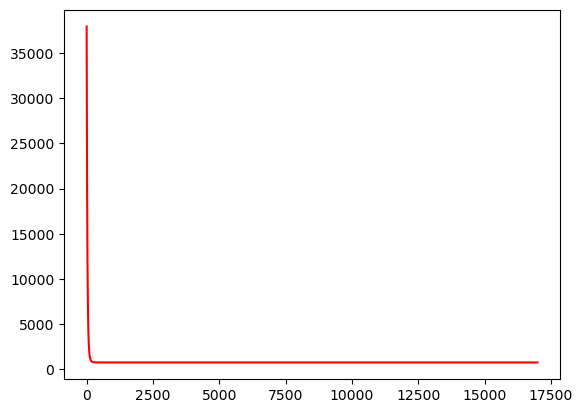

Valor mínimo del error = 728.7410417989433


In [9]:
# --- Grafica de error

plt.plot(T, Error, '-r') # Graficar datos
plt.show()
Min_E = min(Error)
print("Valor mínimo del error = "+str(Min_E))
#--------------------------------------------------------

### Predecir valores
Para predicir valores ingresamos las caracteristicas de la variable X, el modelo nos devolvera una cantidad aproximada de casos confirmados segun las caracteristicas ingresadas

In [12]:
# Insertar las varibles
semana=10 # semana epidemiologia
temperatura=25.16 #temperatura media en grados
precipitacion=108.06 #precipitacion en mm
humedad=83.00 #humedad en porcentaje 


In [13]:
# --- Predecir valores

X1 = semana
X2 = temperatura
X3 = precipitacion 
X4 = humedad   

# --- Normalizar valores
X1_norm = (X1 - mu[0]) / sigma[0]  # Normalizar X1
X2_norm = (X2 - mu[1]) / sigma[1]  # Normalizar X2
X3_norm = (X3 - mu[2]) / sigma[2]  # Normalizar X3
X4_norm = (X4 - mu[3]) / sigma[3]  # Normalizar X4

# --- Mostrar valor predecido
Y_point = w[0] + w[1]*X1_norm + w[2]*X2_norm + w[3]*X3_norm + w[4]*X4_norm  # Valor en Y
print("Característica X1 = " + str(X1) +
      ", Característica X2 = " + str(X2) +
      ", Característica X3 = " + str(X3) +
      ", Característica X4 = " + str(X4))
print( " Valor predecido Y = " + str(Y_point))


Característica X1 = 10, Característica X2 = 25.16, Característica X3 = 108.06, Característica X4 = 83.0
 Valor predecido Y = 8.471732142055384


Valor predecido de Y es igual a la prediccion de casos confirmados segun las caracteristicas